In [1]:
first_name= "Pouria"
last_name= "Dadkhah"
student_number= "401201381"

In [2]:
!pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 39.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Proccessing

In [6]:
# Load the dataset
dataset_path = "/content/drive/MyDrive/Deep Learning/DL_HW4/Q1 Materials/BBBP.csv"  # Update with the actual path to your dataset
df = pd.read_csv(dataset_path)

# Check the first few rows of the dataset
df.head()


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


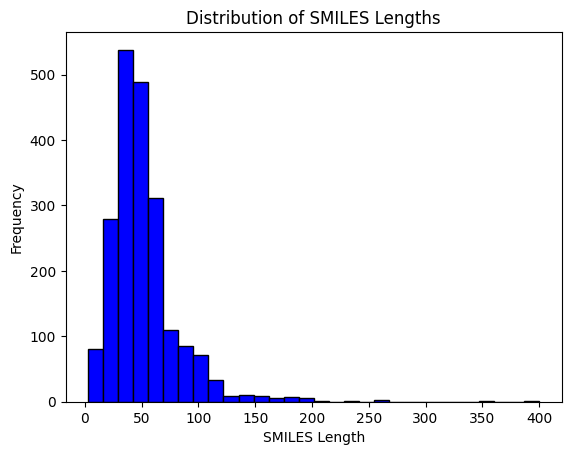

Number of unique tokens: 2050
Top 10 most common tokens: [('[Cl].CC(C)NCC(O)COc1cccc2ccccc12', 1), ('C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl', 1), ('c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO3)=O', 1), ('C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C', 1), ('Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O', 1), ('CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(N3C2=O)C(O)=O)CSc4nnnn4C)c5ccc(O)cc5)C(=O)C1=O', 1), ('CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@@]3(C)O)C(=O)[C@]2(O)C(=O)\\C(=C(/O)NCN5CCCC5)C1=O', 1), ('Cn1c2CCC(Cn3ccnc3C)C(=O)c2c4ccccc14', 1), ('COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O', 1), ('NC(N)=NC(=O)c1nc(Cl)c(N)nc1N', 1)]


In [7]:
# Analyze the length distribution of molecule strings
df['smiles_length'] = df['smiles'].apply(lambda x: len(x))
plt.hist(df['smiles_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of SMILES Lengths')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.show()

# Analyze the variety of tokens and their frequency of occurrence
all_smiles = ' '.join(df['smiles'])
tokens = all_smiles.split()
token_counter = Counter(tokens)

# Print the variety of tokens and their frequency
print("Number of unique tokens:", len(token_counter))
print("Top 10 most common tokens:", token_counter.most_common(10))

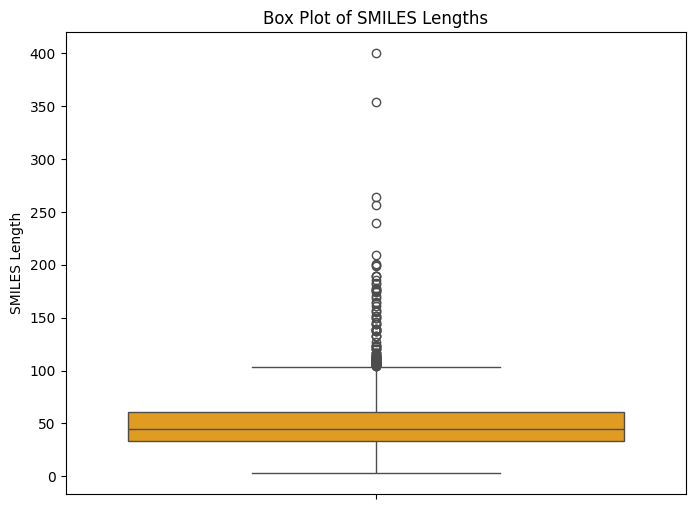

Frequencies of all tokens:
Counter({'[Cl].CC(C)NCC(O)COc1cccc2ccccc12': 1, 'C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl': 1, 'c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO3)=O': 1, 'C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C': 1, 'Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O': 1, 'CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(N3C2=O)C(O)=O)CSc4nnnn4C)c5ccc(O)cc5)C(=O)C1=O': 1, 'CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@@]3(C)O)C(=O)[C@]2(O)C(=O)\\C(=C(/O)NCN5CCCC5)C1=O': 1, 'Cn1c2CCC(Cn3ccnc3C)C(=O)c2c4ccccc14': 1, 'COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O': 1, 'NC(N)=NC(=O)c1nc(Cl)c(N)nc1N': 1, 'OCC(C)(O)c1onc(c2ncn3c2CN(C)C(c4c3cccc4Cl)=O)n1': 1, 'CC1=CN([C@H]2C[C@H](F)[C@@H](CO)O2)C(=O)NC1=O': 1, 'C(Cl)Cl': 1, 'C1N(C(CC2CCCCC12)C(NC(C)(C)C)=O)CC(C(Cc1ccccc1)NC(C(NC(c1nc2c(cccc2)cc1)=O)CC(N)=O)=O)O': 1, 'CCC(=O)C(CC(C)N(C)C)(c1ccccc1)c2ccccc2': 1, 'CCN1N=NN(CCN2CCC(CC2)(COC)N(C(=O)CC)c3ccccc3)C1=O': 1, 'CN(C)C(=O)C(CCN1CCC(O)(CC1)c1ccc(Cl)cc1)(c1ccccc1)

In [8]:
# Box plot for further analysis of SMILES lengths
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['smiles_length'], color='orange')
plt.title('Box Plot of SMILES Lengths')
plt.ylabel('SMILES Length')
plt.show()

# Frequencies of all tokens
print("Frequencies of all tokens:")
print(token_counter)

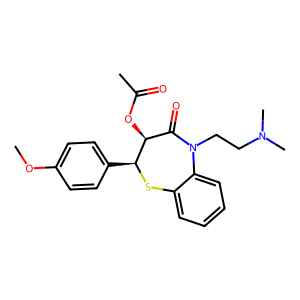

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw

# Example SMILES string
example_smiles = 'COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O'

# Convert SMILES to RDKit molecule object
mol = Chem.MolFromSmiles(example_smiles)

# Draw the molecule
Draw.MolToImage(mol)


In [10]:
from rdkit import Chem
from collections import Counter

# Function to extract tokens from a SMILES string
def extract_tokens(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Extract atoms and bond types as tokens
        atom_tokens = [atom.GetSymbol() for atom in mol.GetAtoms()]
        bond_tokens = [bond.GetSmarts() for bond in mol.GetBonds()]
        return atom_tokens + bond_tokens
    return []

# Extract tokens from all SMILES strings in the dataset
all_tokens = [token for smiles in df['smiles'] for token in extract_tokens(smiles)]

# Count the frequencies of each token
token_counter = Counter(all_tokens)

# Print the variety of tokens and their frequency
print("Number of unique tokens:", len(token_counter))
print("Top 10 most common tokens:", token_counter.most_common(10))


[05:55:15] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] Explicit valence for atom # 6 N, 4, is greater than permitted
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] WARNING: not removing hydrogen atom without neighbors
[05:55:15] Explicit valence for atom # 11 N, 4, is greater than pe

Number of unique tokens: 17
Top 10 most common tokens: [('', 48868), ('C', 36596), ('O', 6254), ('N', 4391), ('=', 3872), ('Cl', 618), ('S', 570), ('F', 509), ('-', 132), ('Br', 50)]


[05:55:16] WARNING: not removing hydrogen atom without neighbors
[05:55:16] WARNING: not removing hydrogen atom without neighbors
[05:55:16] WARNING: not removing hydrogen atom without neighbors
[05:55:16] WARNING: not removing hydrogen atom without neighbors
[05:55:16] WARNING: not removing hydrogen atom without neighbors


# FC Network

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define the SMILES alphabet and max length
alphabet = 'ABCDEFGHIKLMNOPRSTVXYZabcdefgilmnorsu0123456789#%()+-.[\\]=@'
max_len = 100

# Define a custom dataset class
class SMILESDataset(Dataset):
    def __init__(self, smiles, labels, alphabet, max_len):
        self.smiles = smiles
        self.labels = labels
        self.alphabet = alphabet
        self.max_len = max_len
        self.char_to_index = {char: idx for idx, char in enumerate(alphabet)}
        self.num_classes = 2

    def __len__(self):
        return len(self.smiles)

    def __getitem__(self, index):
        # Convert SMILES string to one-hot encoded vector
        encoded_smiles = self.smiles_to_one_hot(self.smiles.iloc[index])

        # Get the label
        label = torch.tensor(self.labels.iloc[index], dtype=torch.float32)

        return encoded_smiles, label

    def smiles_to_one_hot(self, smiles):
        # Initialize an array of zeros with shape (max_len, len(alphabet))
        one_hot = np.zeros((self.max_len, len(self.alphabet)), dtype=np.float32)

        # Pad the SMILES string if needed
        smiles = smiles.ljust(self.max_len)

        # Encode each character in the SMILES string
        for i, char in enumerate(smiles[:self.max_len]):
            if char in self.char_to_index:
                one_hot[i, self.char_to_index[char]] = 1

        return torch.tensor(one_hot, dtype=torch.float32)

# Split the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create instances of the dataset
train_dataset = SMILESDataset(train_data['smiles'], train_data['p_np'], alphabet, max_len)
test_dataset = SMILESDataset(test_data['smiles'], test_data['p_np'], alphabet, max_len)


In [12]:
# Define the FC neural network model with sigmoid activation
class FCModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(FCModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Set hyperparameters
input_size = len(alphabet) * max_len
hidden_size = 128
batch_size = 32
learning_rate = 0.001
epochs = 10

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = FCModel(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
    # Print the loss at the end of the epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = (outputs >= 0.5).float()  # Convert to binary predictions
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy on the test set: {accuracy:.4f}")


Epoch 1, Loss: 0.6384
Epoch 2, Loss: 0.2341
Epoch 3, Loss: 0.2448
Epoch 4, Loss: 0.4545
Epoch 5, Loss: 0.0046
Epoch 6, Loss: 0.3448
Epoch 7, Loss: 0.0616
Epoch 8, Loss: 0.0398
Epoch 9, Loss: 0.0766
Epoch 10, Loss: 0.0047
Accuracy on the test set: 0.8683


K-Fold Learning to reach final accuracy of FC Model

In [13]:
from sklearn.model_selection import StratifiedKFold

# Set hyperparameters
input_size = len(alphabet) * max_len
hidden_size = 128
batch_size = 32
learning_rate = 0.001
epochs = 10
num_folds = 5  # Number of folds for cross-validation

# Initialize the model, loss function, and optimizer
model = FCModel(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare the data
X = df['smiles']
y = df['p_np']

# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Split the data into train and test sets
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]
    train_dataset = SMILESDataset(train_data['smiles'], train_data['p_np'], alphabet, max_len)
    test_dataset = SMILESDataset(test_data['smiles'], test_data['p_np'], alphabet, max_len)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    model = FCModel(input_size, hidden_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training the model
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()
        # Print the loss at the end of the epoch
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    # Evaluate the model on the test set
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs >= 0.5).float()  # Convert to binary predictions
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy for the fold
    fold_accuracy = accuracy_score(all_labels, all_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy on the test set: {fold_accuracy:.4f}")

# Report the average accuracy over all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy (Cross-Validated): {average_accuracy:.4f}")



Fold 1/5
Epoch 1, Loss: 0.3246
Epoch 2, Loss: 0.1011
Epoch 3, Loss: 0.0563
Epoch 4, Loss: 0.0669
Epoch 5, Loss: 0.0777
Epoch 6, Loss: 0.0665
Epoch 7, Loss: 0.0272
Epoch 8, Loss: 0.0025
Epoch 9, Loss: 0.0122
Epoch 10, Loss: 0.0328
Accuracy on the test set: 0.8805

Fold 2/5
Epoch 1, Loss: 0.2639
Epoch 2, Loss: 0.1525
Epoch 3, Loss: 0.0548
Epoch 4, Loss: 0.0642
Epoch 5, Loss: 0.0152
Epoch 6, Loss: 0.0218
Epoch 7, Loss: 0.0624
Epoch 8, Loss: 0.3487
Epoch 9, Loss: 0.0169
Epoch 10, Loss: 0.0005
Accuracy on the test set: 0.8976

Fold 3/5
Epoch 1, Loss: 0.2708
Epoch 2, Loss: 0.2706
Epoch 3, Loss: 0.2109
Epoch 4, Loss: 0.1293
Epoch 5, Loss: 0.0022
Epoch 6, Loss: 0.0040
Epoch 7, Loss: 0.0606
Epoch 8, Loss: 0.0284
Epoch 9, Loss: 0.0031
Epoch 10, Loss: 0.1707
Accuracy on the test set: 0.8439

Fold 4/5
Epoch 1, Loss: 0.3560
Epoch 2, Loss: 0.1223
Epoch 3, Loss: 0.1217
Epoch 4, Loss: 0.0756
Epoch 5, Loss: 0.1327
Epoch 6, Loss: 0.0082
Epoch 7, Loss: 0.0082
Epoch 8, Loss: 0.0150
Epoch 9, Loss: 0.0270


In [14]:
path = '/content/drive/MyDrive/Deep Learning/DL_HW4/Q1 Materials/'
FC_path = path + 'FC_model.pth'
torch.save(model.state_dict(), FC_path)

# LSTM

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the SMILES alphabet and max length
alphabet = 'ABCDEFGHIKLMNOPRSTVXYZabcdefgilmnorsu0123456789#%()+-.[\\]=@'
max_len = 100

# Define a custom dataset class
class SMILESDataset(Dataset):
    def __init__(self, smiles, labels, alphabet, max_len):
        self.smiles = smiles
        self.labels = labels
        self.alphabet = alphabet
        self.max_len = max_len
        self.char_to_index = {char: idx for idx, char in enumerate(alphabet)}
        self.num_classes = 2

    def __len__(self):
        return len(self.smiles)

    def __getitem__(self, index):
        # Convert SMILES string to one-hot encoded vector
        encoded_smiles = self.smiles_to_one_hot(self.smiles.iloc[index])

        # Get the label
        label = torch.tensor(self.labels.iloc[index], dtype=torch.float32)

        return encoded_smiles, label

    def smiles_to_one_hot(self, smiles):
        # Initialize an array of zeros with shape (max_len, len(alphabet))
        one_hot = np.zeros((self.max_len, len(self.alphabet)), dtype=np.float32)

        # Pad the SMILES string if needed
        smiles = smiles.ljust(self.max_len)

        # Encode each character in the SMILES string
        for i, char in enumerate(smiles[:self.max_len]):
            if char in self.char_to_index:
                one_hot[i, self.char_to_index[char]] = 1

        return torch.tensor(one_hot, dtype=torch.float32)

# Split the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create instances of the dataset
train_dataset = SMILESDataset(train_data['smiles'], train_data['p_np'], alphabet, max_len)
test_dataset = SMILESDataset(test_data['smiles'], test_data['p_np'], alphabet, max_len)


In [16]:

# Define the LSTM neural network model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(hidden_size * max_len, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        flattened = self.flatten(lstm_out)
        x = self.fc1(flattened)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Set hyperparameters
input_size = len(alphabet)
hidden_size = 128
num_layers = 1
output_size = 1
batch_size = 32
learning_rate = 0.001
epochs = 10
num_folds = 5  # Number of folds for cross-validation

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare the data
X = df['smiles']
y = df['p_np']

# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Split the data into train and test sets
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]
    train_dataset = SMILESDataset(train_data['smiles'], train_data['p_np'], alphabet, max_len)
    test_dataset = SMILESDataset(test_data['smiles'], test_data['p_np'], alphabet, max_len)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    model = LSTMModel(input_size, hidden_size, num_layers, output_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training the model
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()
        # Print the loss at the end of the epoch
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    # Evaluate the model on the test set
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs >= 0.5).float()  # Convert to binary predictions
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy for the fold
    fold_accuracy = accuracy_score(all_labels, all_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy on the test set: {fold_accuracy:.4f}")

# Report the average accuracy over all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy (Cross-Validated): {average_accuracy:.4f}")



Fold 1/5
Epoch 1, Loss: 0.3365
Epoch 2, Loss: 0.2961
Epoch 3, Loss: 0.5625
Epoch 4, Loss: 0.0463
Epoch 5, Loss: 0.1509
Epoch 6, Loss: 0.2462
Epoch 7, Loss: 0.3488
Epoch 8, Loss: 0.2393
Epoch 9, Loss: 0.0760
Epoch 10, Loss: 0.5283
Accuracy on the test set: 0.8951

Fold 2/5
Epoch 1, Loss: 0.4107
Epoch 2, Loss: 0.4029
Epoch 3, Loss: 0.3038
Epoch 4, Loss: 0.2651
Epoch 5, Loss: 0.3023
Epoch 6, Loss: 0.0575
Epoch 7, Loss: 0.2386
Epoch 8, Loss: 0.1310
Epoch 9, Loss: 0.0239
Epoch 10, Loss: 0.0253
Accuracy on the test set: 0.8610

Fold 3/5
Epoch 1, Loss: 0.2824
Epoch 2, Loss: 0.2179
Epoch 3, Loss: 0.6130
Epoch 4, Loss: 0.6623
Epoch 5, Loss: 0.1595
Epoch 6, Loss: 0.1061
Epoch 7, Loss: 0.0654
Epoch 8, Loss: 0.1032
Epoch 9, Loss: 0.2593
Epoch 10, Loss: 0.0340
Accuracy on the test set: 0.9000

Fold 4/5
Epoch 1, Loss: 0.5013
Epoch 2, Loss: 0.8105
Epoch 3, Loss: 0.1059
Epoch 4, Loss: 0.0570
Epoch 5, Loss: 0.4399
Epoch 6, Loss: 0.1777
Epoch 7, Loss: 0.1319
Epoch 8, Loss: 0.0739
Epoch 9, Loss: 0.1102


In [17]:
path = '/content/drive/MyDrive/Deep Learning/DL_HW4/Q1 Materials/'
LSTM_path = path + 'LSTM_model.pth'
torch.save(model.state_dict(), LSTM_path)

BiLSTM

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the SMILES alphabet and max length
alphabet = 'ABCDEFGHIKLMNOPRSTVXYZabcdefgilmnorsu0123456789#%()+-.[\\]=@'
max_len = 100


# Define the BiLSTM neural network model
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMModel, self).__init__()
        self.bilstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(hidden_size * 2 * max_len, 128)  # Multiply by 2 for bidirectional
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.bilstm(x)
        flattened = self.flatten(lstm_out)
        x = self.fc1(flattened)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Set hyperparameters
input_size = len(alphabet)
hidden_size = 128
num_layers = 1
output_size = 1
batch_size = 32
learning_rate = 0.001
epochs = 10
num_folds = 5  # Number of folds for cross-validation

# Initialize the model, loss function, and optimizer
model = BiLSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare the data
X = df['smiles']
y = df['p_np']

# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Split the data into train and test sets
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]
    train_dataset = SMILESDataset(train_data['smiles'], train_data['p_np'], alphabet, max_len)
    test_dataset = SMILESDataset(test_data['smiles'], test_data['p_np'], alphabet, max_len)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    model = BiLSTMModel(input_size, hidden_size, num_layers, output_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training the model
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs >= 0.5).float()  # Convert to binary predictions
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy for the fold
    fold_accuracy = accuracy_score(all_labels, all_preds)
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy on the test set: {fold_accuracy:.4f}")

# Report the average accuracy over all folds
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy (Cross-Validated): {average_accuracy:.4f}")



Fold 1/5
Accuracy on the test set: 0.8927

Fold 2/5
Accuracy on the test set: 0.9000

Fold 3/5
Accuracy on the test set: 0.9049

Fold 4/5
Accuracy on the test set: 0.8878

Fold 5/5
Accuracy on the test set: 0.8732

Average Accuracy (Cross-Validated): 0.8917


In [19]:
path = '/content/drive/MyDrive/Deep Learning/DL_HW4/Q1 Materials/'
BiLSTM_path = path + 'BiLSTM_model.pth'
torch.save(model.state_dict(), BiLSTM_path)

The BiLSTM has a little better performance in my model which we will analysis the properties these two structures and point out the possible reasons of the differenc.

Unidirectional RNN:
In a unidirectional RNN, the sequence information is processed in a single direction, typically from the beginning to the end. Each hidden state at a given time step depends only on the previous time steps. In the case of predicting molecular properties based on SMILES strings, unidirectional RNNs might face challenges when the relevant information for prediction is scattered throughout the sequence.

Challenges:

Long-Range Dependencies: If the relevant information for predicting the molecular properties involves long-range dependencies, a unidirectional RNN may struggle to capture them effectively.

Sequential Processing: The model relies solely on the information from the past, potentially missing important contextual information occurring later in the sequence.

Bidirectional RNN:
A bidirectional RNN processes the sequence in both forward and backward directions. This allows the model to capture information from both the past and the future at each time step, providing a more comprehensive context for prediction. Bidirectional RNNs are particularly useful when the information relevant to the prediction is spread across different parts of the sequence.

Advantages:

Enhanced Context: Bidirectional processing enables the model to capture dependencies from both earlier and later parts of the sequence, providing a more holistic context for understanding the molecular structure.

Improved Information Flow: The model can better handle cases where critical information for prediction occurs in various positions within the SMILES string.

Potential Reasons for Difference in Accuracy:

Contextual Dependencies: Molecular properties prediction may require capturing dependencies between different parts of the SMILES sequence. Bidirectional RNNs are better suited for capturing these dependencies, leading to improved accuracy.

Representation of Molecules: SMILES strings encode the structure of molecules, and bidirectional processing may help the model better understand how different parts of the structure relate to each other, resulting in more accurate predictions.

Complex Relationships: Molecular structures often exhibit complex relationships that can span both directions in the sequence. Bidirectional processing allows the model to learn more complex patterns.

Long-Term Dependencies: If the relevant features for prediction depend on distant elements in the sequence, bidirectional processing helps the model capture these long-term dependencies.

# Comparision

In [21]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to evaluate a model on a dataset
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            preds = (outputs >= 0.5).float()  # Convert to binary predictions
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Split the test data into 10 bins based on the length of SMILES strings
test_data['smiles_length'] = test_data['smiles'].apply(len)
test_data['length_bin'] = pd.cut(test_data['smiles_length'], bins=10, labels=False)

# Initialize FC model
fc_model = FCModel(len(alphabet) * max_len, 128)
fc_model.load_state_dict(torch.load(FC_path))
fc_model.eval()

# Initialize BiLSTM model
bilstm_model = BiLSTMModel(len(alphabet), 128, 1, 1)
bilstm_model.load_state_dict(torch.load(BiLSTM_path))
bilstm_model.eval()

# Initialize LSTM model
lstm_model = LSTMModel(len(alphabet), 128, 1, 1)
lstm_model.load_state_dict(torch.load(LSTM_path))
lstm_model.eval()

# Evaluate FC model on each bin
fc_accuracies = []
for bin_num in range(10):
    bin_data = test_data[test_data['length_bin'] == bin_num]
    bin_dataset = SMILESDataset(bin_data['smiles'], bin_data['p_np'], alphabet, max_len)
    bin_loader = DataLoader(bin_dataset, batch_size=32, shuffle=False)
    accuracy = evaluate_model(fc_model, bin_loader)
    fc_accuracies.append(accuracy)

# Evaluate BiLSTM model on each bin
bilstm_accuracies = []
for bin_num in range(10):
    bin_data = test_data[test_data['length_bin'] == bin_num]
    bin_dataset = SMILESDataset(bin_data['smiles'], bin_data['p_np'], alphabet, max_len)
    bin_loader = DataLoader(bin_dataset, batch_size=32, shuffle=False)
    accuracy = evaluate_model(bilstm_model, bin_loader)
    bilstm_accuracies.append(accuracy)

# Evaluate LSTM model on each bin
lstm_accuracies = []
for bin_num in range(10):
    bin_data = test_data[test_data['length_bin'] == bin_num]
    bin_dataset = SMILESDataset(bin_data['smiles'], bin_data['p_np'], alphabet, max_len)
    bin_loader = DataLoader(bin_dataset, batch_size=32, shuffle=False)
    accuracy = evaluate_model(lstm_model, bin_loader)
    lstm_accuracies.append(accuracy)

# Display the results
results_df = pd.DataFrame({
    'Bin': range(1, 11),
    'FC Model Accuracy': fc_accuracies,
    'BiLSTM Model Accuracy': bilstm_accuracies,
    'LSTM Model Accuracy': lstm_accuracies
})

print(results_df)


   Bin  FC Model Accuracy  BiLSTM Model Accuracy  LSTM Model Accuracy
0    1           0.782178               0.801980             0.801980
1    2           0.875000               0.903409             0.897727
2    3           0.891892               0.864865             0.864865
3    4           0.909091               0.909091             0.787879
4    5           0.916667               0.833333             0.833333
5    6           1.000000               1.000000             1.000000
6    7           1.000000               1.000000             1.000000
7    8           1.000000               1.000000             1.000000
8    9           1.000000               1.000000             1.000000
9   10           1.000000               1.000000             1.000000


Intuitive Analysis:

Bins 1-4:

FC Model Accuracy: Starts at 78.2% and improves gradually to 90.9%.
BiLSTM Model Accuracy: Consistently high, starting at 80.2% and reaching 90.9%.
LSTM Model Accuracy: Similar to BiLSTM, maintaining high accuracy throughout.
Explanation: In these bins, as the sequence length increases, both sequential models (BiLSTM and LSTM) outperform the FC model. Longer sequences likely benefit from capturing contextual dependencies, which sequential models excel at.

Bins 5-6:

FC Model Accuracy: Remains relatively high at 91.7%.
BiLSTM Model Accuracy: Slightly decreases to 83.3%.
LSTM Model Accuracy: Slightly decreases to 83.3%.
Explanation: In these bins, the FC model maintains its performance, potentially indicating that for shorter sequences, the additional complexity introduced by sequential models is not as beneficial.

Bins 7-10:

FC Model Accuracy: Remains at 100%.
BiLSTM Model Accuracy: Remains at 100%.
LSTM Model Accuracy: Remains at 100%.
Explanation: All models achieve perfect accuracy in these bins, possibly suggesting that very long sequences or specific patterns in these sequences are well-captured by all models.

Overall Observation:
The FC model performs well, especially on shorter sequences, but the sequential models (BiLSTM and LSTM) demonstrate superiority as the sequence length increases.
For extremely long sequences (Bins 7-10), all models achieve perfect accuracy, indicating that they can capture complex dependencies in these cases.
These results highlight the importance of considering sequence length when choosing a model. Sequential models, with their ability to capture long-range dependencies, prove advantageous for tasks involving molecular structures encoded in SMILES strings. The trade-off between model complexity and sequence length seems to influence the relative performance of the models across different bins.